In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv', error_bad_lines=False, nrows=10000).sample(frac=1)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2257,2015-05-05,Albury,5.5,20.5,0.0,NaN,NaN,NW,65.0,SSE,WNW,6.0,35.0,86.0,36.0,1005.9,1005.2,8.0,8.0,11.9,17.6,No,No
6269,2009-08-09,Cobar,1.7,17.6,0.0,3.2,8.8,NNE,19.0,NE,NNE,9.0,6.0,55.0,26.0,1020.7,1016.5,7.0,7.0,7.7,16.2,No,No
4905,2014-05-09,BadgerysCreek,7.8,20.8,0.0,NaN,NaN,WSW,15.0,SW,NNE,9.0,6.0,73.0,53.0,1026.5,1023.4,NaN,NaN,13.9,19.7,No,No
5817,2016-11-06,BadgerysCreek,9.1,26.4,0.0,NaN,NaN,SSW,46.0,WSW,SSW,22.0,20.0,32.0,27.0,1009.0,1007.0,NaN,NaN,19.1,25.7,No,No
2809,2016-11-07,Albury,8.8,29.4,0.0,NaN,NaN,NNW,50.0,SSE,NNW,4.0,31.0,70.0,22.0,1010.3,1003.7,NaN,3.0,15.8,28.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,2011-03-14,Cobar,20.7,35.0,0.0,8.0,NaN,SSE,39.0,ESE,NE,11.0,4.0,57.0,28.0,1019.1,1016.2,1.0,4.0,25.6,32.0,No,No
8788,2016-09-29,Cobar,9.0,17.0,3.4,5.8,NaN,NW,65.0,WNW,NW,33.0,37.0,NaN,NaN,1000.1,998.3,NaN,8.0,13.1,15.8,Yes,Yes
8625,2016-04-19,Cobar,14.4,28.9,0.0,4.6,NaN,ENE,24.0,ENE,SE,13.0,9.0,55.0,25.0,1019.9,1017.1,7.0,5.0,20.3,28.0,No,No
2023,2014-09-13,Albury,2.6,19.3,0.0,NaN,NaN,NNE,17.0,SSE,NNE,7.0,7.0,77.0,51.0,1026.7,1022.4,NaN,1.0,10.2,17.7,No,No


Remoção de colunas que não serão importantes para classificação

In [3]:
del df['Date']
del df['Evaporation']
del df['Sunshine']
del df['WindGustDir']
del df['WindGustSpeed']
del df['WindDir9am']
del df['Pressure9am']
del df['Pressure3pm']
del df['Cloud9am']
del df['Cloud3pm']
del df['Temp9am']
del df['WindDir3pm']   
del df['WindSpeed9am']   
del df['WindSpeed3pm']   


In [4]:
df

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow
2257,Albury,5.5,20.5,0.0,86.0,36.0,17.6,No,No
6269,Cobar,1.7,17.6,0.0,55.0,26.0,16.2,No,No
4905,BadgerysCreek,7.8,20.8,0.0,73.0,53.0,19.7,No,No
5817,BadgerysCreek,9.1,26.4,0.0,32.0,27.0,25.7,No,No
2809,Albury,8.8,29.4,0.0,70.0,22.0,28.2,No,No
...,...,...,...,...,...,...,...,...,...
6851,Cobar,20.7,35.0,0.0,57.0,28.0,32.0,No,No
8788,Cobar,9.0,17.0,3.4,NaN,NaN,15.8,Yes,Yes
8625,Cobar,14.4,28.9,0.0,55.0,25.0,28.0,No,No
2023,Albury,2.6,19.3,0.0,77.0,51.0,17.7,No,No


### Removendo linhas com NaN ou NA

In [5]:
hasNan = df.isnull().sum()
print(hasNan)
df.dropna(inplace=True)
hasNan = df.isnull().sum()
print(hasNan)

Location          0
MinTemp          54
MaxTemp          45
Rainfall        132
Humidity9am     188
Humidity3pm     189
Temp3pm          60
RainToday       132
RainTomorrow    132
dtype: int64
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Humidity9am     0
Humidity3pm     0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


### Fazendo o label_encoder para os dados binários

In [6]:
from sklearn.preprocessing import LabelEncoder

rainToday = []
raintTomorrow = []

le = LabelEncoder()
le.fit(df['RainToday'])
df['RainToday'] = le.transform(df['RainToday'])
rainToday = le.inverse_transform(df['RainToday'])

le.fit(df['RainTomorrow'])
df['RainTomorrow'] = le.transform(df['RainTomorrow'])
rainTomorrow = le.inverse_transform(df['RainTomorrow'])

In [7]:
print("RainToday: ")
print(rainToday)

print("RainTomorrow: ")
print(rainTomorrow)

RainToday: 
['No' 'No' 'No' ... 'No' 'No' 'No']
RainTomorrow: 
['No' 'No' 'No' ... 'No' 'No' 'No']


In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow
2257,Albury,5.5,20.5,0.0,86.0,36.0,17.6,0,0
6269,Cobar,1.7,17.6,0.0,55.0,26.0,16.2,0,0
4905,BadgerysCreek,7.8,20.8,0.0,73.0,53.0,19.7,0,0
5817,BadgerysCreek,9.1,26.4,0.0,32.0,27.0,25.7,0,0
2809,Albury,8.8,29.4,0.0,70.0,22.0,28.2,0,0
...,...,...,...,...,...,...,...,...,...
8071,Cobar,17.7,24.1,0.0,44.0,26.0,23.4,0,0
6851,Cobar,20.7,35.0,0.0,57.0,28.0,32.0,0,0
8625,Cobar,14.4,28.9,0.0,55.0,25.0,28.0,0,0
2023,Albury,2.6,19.3,0.0,77.0,51.0,17.7,0,0


### Verificação da necessidade de remoção de outliers

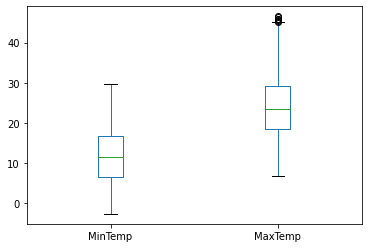

In [9]:
df[['MinTemp', 'MaxTemp']].plot(kind = 'box')

In [10]:
import seaborn as sb

# sb.pairplot(df, kind='') // Gráfico com ondas

In [11]:
# sb.pairplot(data=df, hue='Location')

### Transformando a classe em dados numericos

In [12]:
le.fit(df['Location'])
df['Location'] = le.transform(df['Location'])
rainTomorrow = le.inverse_transform(df['Location'])

df['Location'].value_counts()

0    2981
2    2860
1    2842
3     936
Name: Location, dtype: int64

In [13]:
from imblearn.under_sampling import NearMiss 

X, y = NearMiss().fit_resample(df.drop(columns=['Location']), df['Location'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [14]:
dfBalanceado = pd.DataFrame(X, columns=df.columns.drop('Location'))
dfBalanceado['Location'] = y
print(dfBalanceado)

      MinTemp  MaxTemp  Rainfall  ...  RainToday  RainTomorrow  Location
0        11.4     22.2       0.0  ...        0.0           0.0         0
1         8.2     22.2       0.0  ...        0.0           0.0         0
2         1.6     17.2       0.0  ...        0.0           0.0         0
3         2.3     18.0       0.0  ...        0.0           0.0         0
4        14.5     26.9       0.0  ...        0.0           0.0         0
...       ...      ...       ...  ...        ...           ...       ...
3739     13.1     20.2      19.0  ...        1.0           0.0         3
3740     16.0     23.9       0.6  ...        0.0           0.0         3
3741     18.0     23.2       5.2  ...        1.0           1.0         3
3742     11.6     23.6       0.0  ...        0.0           0.0         3
3743     19.8     27.1      24.4  ...        1.0           1.0         3

[3744 rows x 9 columns]


In [15]:
dfBalanceado['Location'].value_counts()

3    936
1    936
2    936
0    936
Name: Location, dtype: int64

In [16]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

dfStandard = dfBalanceado.copy()

dfStandard[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']] = StandardScaler().fit_transform(dfStandard[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']])

dfStandard

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow,Location
0,0.061312,0.015536,-0.188333,-0.270677,-0.070657,0.108431,-0.464311,-0.522115,0
1,-0.518964,0.015536,-0.188333,0.270352,-0.070657,-0.167361,-0.464311,-0.522115,0
2,-1.715786,-1.157642,-0.188333,-0.000163,-0.497926,-1.019811,-0.464311,-0.522115,0
3,-1.588850,-0.969933,-0.188333,-0.000163,-0.436888,-0.844307,-0.464311,-0.522115,0
4,0.623456,1.118323,-0.188333,-0.203048,-0.131696,1.261746,-0.464311,-0.522115,0
...,...,...,...,...,...,...,...,...,...
3739,0.369585,-0.453735,1.625121,0.067466,2.859187,-0.468226,2.153730,-0.522115,3
3740,0.895461,0.414416,-0.131066,1.081895,0.417650,0.685089,-0.464311,-0.522115,3
3741,1.258134,0.250171,0.307981,1.690552,2.004649,0.409296,2.153730,1.915288,3
3742,0.097580,0.344026,-0.188333,0.405609,-0.131696,0.509584,-0.464311,-0.522115,3


In [18]:
from sklearn.preprocessing import MinMaxScaler

dfMinMax = dfBalanceado.copy()

dfMinMax[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']] = MinMaxScaler().fit_transform(dfMinMax[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']])

dfMinMax

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow,Location
0,0.465116,0.375000,0.000000,0.544304,0.460674,0.388679,0.0,0.0,0
1,0.341085,0.375000,0.000000,0.645570,0.460674,0.347170,0.0,0.0,0
2,0.085271,0.173387,0.000000,0.594937,0.382022,0.218868,0.0,0.0,0
3,0.112403,0.205645,0.000000,0.594937,0.393258,0.245283,0.0,0.0,0
4,0.585271,0.564516,0.000000,0.556962,0.449438,0.562264,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
3739,0.531008,0.294355,0.051213,0.607595,1.000000,0.301887,1.0,0.0,3
3740,0.643411,0.443548,0.001617,0.797468,0.550562,0.475472,0.0,0.0,3
3741,0.720930,0.415323,0.014016,0.911392,0.842697,0.433962,1.0,1.0,3
3742,0.472868,0.431452,0.000000,0.670886,0.449438,0.449057,0.0,0.0,3


In [19]:
dfStandard.to_csv('/content/drive/MyDrive/dfStandard.csv', index=False)
dfMinMax.to_csv('/content/drive/MyDrive/dfMinMax.csv', index=False)

**KNN com StandardScale**

In [21]:
from sklearn.model_selection import GridSearchCV
#dividindo a base
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(dfStandard.drop(columns='Location', axis = 1), dfStandard['Location'],test_size=0.33, stratify=dfStandard['Location'])

param_grid = {'n_neighbors': range(1,30,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid, verbose = 3)#verbose indica a quantidade de detalhamento das mensagens apresentadas no fit
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.474, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.516, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.464, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.483, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.487, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.474, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.483, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.487, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.460, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.506, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.466, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.493, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.485, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   28.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

class runmodel:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: se None faz N holdouts, se int faz validação cruzada (ambos com estratificação por classe)
    n = quantidade de repetições da amostragem

    Guardar as métricas de cada execução (armazenametricas) e 
    Mostrar os valores médios com desvio padrão para as métricas (mostraresultadomedio) 

    Se dataset tiver mais de 2 classes, adaptar resultados    
  '''

  def __init__(self, X, y, model, cv = None, n = 1):
    
    self.__resultados = {
      'precision_0': [],
      'recall_0': [],
      'f1_0': [],
      'support_0': [],
      'precision_1': [],
      'recall_1': [],
      'f1_1': [],
      'support_1' : [],
      'precision_2': [],
      'recall_2': [],
      'f1_2': [],
      'support_2': [],
      'precision_3': [],
      'recall_3': [],
      'f1_3': [],
      'support_3': [],
      'accuracy' : [],
      'precision_wavg' : [],
      'recall_wavg' : [],
      'f1_wavg' : [],
      'support_wavg' : []
    }

    if cv is None:
      print(f'{n} holdouts')
      for i in range(n):
        self.__avaliamodelo(X, y, model)
    
    else:
      print(f'{n} validação cruzada com {cv} folds')
      for i in range(n):
        self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo(self, X, y, model):
    #gera as amostras de treino (2/3) e teste (1/3) com estratificação por classe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
    # Treina o modelo usando os dados de treino
    model.fit(X_train,y_train)
    # Testa modelo usando os dados de teste
    pred = model.predict(X_test)
    #armazena resultado
    self.__armazenametricas(metrics.classification_report(y_test,pred, output_dict= True))

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    skf = StratifiedKFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in skf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__armazenametricas(metrics.classification_report(y.iloc[test_index], pred, output_dict= True))

  def __armazenametricas(self, d):
    self.__resultados['precision_0'].append(d['0']['precision'])
    self.__resultados['recall_0'].append(d['0']['recall'])
    self.__resultados['f1_0'].append(d['0']['f1-score'])
    self.__resultados['support_0'].append(d['0']['support'])

    self.__resultados['precision_1'].append(d['1']['precision'])
    self.__resultados['recall_1'].append(d['1']['recall'])
    self.__resultados['f1_1'].append(d['1']['f1-score'])
    self.__resultados['support_1'].append(d['1']['support'])

    self.__resultados['precision_2'].append(d['2']['precision'])
    self.__resultados['recall_2'].append(d['2']['recall'])
    self.__resultados['f1_2'].append(d['2']['f1-score'])
    self.__resultados['support_2'].append(d['2']['support'])

    self.__resultados['precision_3'].append(d['3']['precision'])
    self.__resultados['recall_3'].append(d['3']['recall'])
    self.__resultados['f1_3'].append(d['3']['f1-score'])
    self.__resultados['support_3'].append(d['3']['support'])

    self.__resultados['accuracy'].append(d['accuracy'])
    
    self.__resultados['precision_wavg'].append(d['weighted avg']['precision'])
    self.__resultados['recall_wavg'].append(d['weighted avg']['recall'])
    self.__resultados['f1_wavg'].append(d['weighted avg']['f1-score'])
    self.__resultados['support_wavg'].append(d['weighted avg']['support'])

  def mostraresultadomedio(self):
    print(f"\t\t precision \t recall \t f1-score \t support\n")
    print(f"0 \t\t {round(np.mean(self.__resultados['precision_0']), 2)}({round(np.std(self.__resultados['precision_0']),2)}) \t {round(np.mean(self.__resultados['recall_0']),2)}({round(np.std(self.__resultados['recall_0']),2)}) \t {round(np.mean(self.__resultados['f1_0']),2)}({round(np.std(self.__resultados['f1_0']),2)}) \t {round(np.mean(self.__resultados['support_0']),2)}({round(np.std(self.__resultados['support_0']),2)})\n")
    print(f"1 \t\t {round(np.mean(self.__resultados['precision_1']), 2)}({round(np.std(self.__resultados['precision_1']),2)}) \t {round(np.mean(self.__resultados['recall_1']),2)}({round(np.std(self.__resultados['recall_1']),2)}) \t {round(np.mean(self.__resultados['f1_1']),2)}({round(np.std(self.__resultados['f1_1']),2)}) \t {round(np.mean(self.__resultados['support_1']),2)}({round(np.std(self.__resultados['support_1']),2)})\n")
    print(f"2 \t\t {round(np.mean(self.__resultados['precision_2']), 2)}({round(np.std(self.__resultados['precision_2']),2)}) \t {round(np.mean(self.__resultados['recall_2']),2)}({round(np.std(self.__resultados['recall_2']),2)}) \t {round(np.mean(self.__resultados['f1_2']),2)}({round(np.std(self.__resultados['f1_2']),2)}) \t {round(np.mean(self.__resultados['support_2']),2)}({round(np.std(self.__resultados['support_2']),2)})\n")
    print(f"3 \t\t {round(np.mean(self.__resultados['precision_3']), 2)}({round(np.std(self.__resultados['precision_3']),2)}) \t {round(np.mean(self.__resultados['recall_3']),2)}({round(np.std(self.__resultados['recall_3']),2)}) \t {round(np.mean(self.__resultados['f1_3']),2)}({round(np.std(self.__resultados['f1_3']),2)}) \t {round(np.mean(self.__resultados['support_3']),2)}({round(np.std(self.__resultados['support_3']),2)})\n")
    print(f"accuracy \t\t  \t\t  \t {round(np.mean(self.__resultados['accuracy']), 2)}({round(np.std(self.__resultados['accuracy']),2)}) \t\t \n")
    print(f"weighted avg \t {round(np.mean(self.__resultados['precision_wavg']), 2)}({round(np.std(self.__resultados['precision_wavg']),2)}) \t {round(np.mean(self.__resultados['recall_wavg']),2)}({round(np.std(self.__resultados['recall_wavg']),2)}) \t {round(np.mean(self.__resultados['f1_wavg']),2)}({round(np.std(self.__resultados['f1_wavg']),2)}) \t {round(np.mean(self.__resultados['support_wavg']),2)}({round(np.std(self.__resultados['support_wavg']),2)})\n")

In [28]:
treino = runmodel(dfStandard.drop('Location', axis = 1), dfStandard['Location'], grid.best_estimator_, 10, 1)

treino.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.57(0.05) 	 0.56(0.05) 	 0.56(0.04) 	 93.6(0.49)

1 		 0.51(0.02) 	 0.49(0.04) 	 0.5(0.02) 	 93.6(0.49)

2 		 0.61(0.06) 	 0.59(0.04) 	 0.6(0.04) 	 93.6(0.49)

3 		 0.61(0.03) 	 0.65(0.05) 	 0.63(0.03) 	 93.6(0.49)

accuracy 		  		  	 0.57(0.01) 		 

weighted avg 	 0.57(0.02) 	 0.57(0.01) 	 0.57(0.01) 	 374.4(0.49)



**KNN com MinMax Scale**

In [29]:
from sklearn.model_selection import GridSearchCV
#dividindo a base
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(dfMinMax.drop(columns='Location', axis = 1), dfMinMax['Location'],test_size=0.33, stratify=dfMinMax['Location'])

param_grid = {'n_neighbors': range(1,30,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid, verbose = 3)#verbose indica a quantidade de detalhamento das mensagens apresentadas no fit
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.480, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.494, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.474, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.491, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.475, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.480, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.491, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.475, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.476, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.490, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.488, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.467, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.497, total=   0.0s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV]  

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   29.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
treinoMinMax = runmodel(dfMinMax.drop('Location', axis = 1), dfMinMax['Location'], grid.best_estimator_, 10, 1)

treinoMinMax.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.57(0.06) 	 0.55(0.05) 	 0.56(0.05) 	 93.6(0.49)

1 		 0.5(0.05) 	 0.47(0.06) 	 0.48(0.05) 	 93.6(0.49)

2 		 0.61(0.04) 	 0.59(0.06) 	 0.6(0.04) 	 93.6(0.49)

3 		 0.59(0.03) 	 0.66(0.04) 	 0.63(0.03) 	 93.6(0.49)

accuracy 		  		  	 0.57(0.03) 		 

weighted avg 	 0.57(0.04) 	 0.57(0.03) 	 0.57(0.03) 	 374.4(0.49)



**NaiveBayes com StandardScale**

In [34]:
from sklearn.naive_bayes import GaussianNB

treinoStandardNaive = runmodel(dfStandard.drop('Location', axis = 1), dfStandard['Location'], GaussianNB(), 10, 1)

treinoStandardNaive.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.47(0.04) 	 0.34(0.07) 	 0.39(0.05) 	 93.6(0.49)

1 		 0.37(0.04) 	 0.5(0.03) 	 0.42(0.03) 	 93.6(0.49)

2 		 0.45(0.02) 	 0.57(0.05) 	 0.5(0.03) 	 93.6(0.49)

3 		 0.54(0.07) 	 0.34(0.05) 	 0.41(0.05) 	 93.6(0.49)

accuracy 		  		  	 0.44(0.01) 		 

weighted avg 	 0.46(0.01) 	 0.44(0.01) 	 0.43(0.01) 	 374.4(0.49)



**NaiveBayes com MinMax Scale**

In [33]:
from sklearn.naive_bayes import GaussianNB

treinoMinMaxNaive = runmodel(dfMinMax.drop('Location', axis = 1), dfMinMax['Location'], GaussianNB(), 10, 1)

treinoMinMaxNaive.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.48(0.05) 	 0.35(0.04) 	 0.4(0.04) 	 93.6(0.49)

1 		 0.37(0.03) 	 0.5(0.03) 	 0.42(0.03) 	 93.6(0.49)

2 		 0.45(0.03) 	 0.58(0.04) 	 0.51(0.03) 	 93.6(0.49)

3 		 0.55(0.08) 	 0.34(0.04) 	 0.42(0.05) 	 93.6(0.49)

accuracy 		  		  	 0.44(0.02) 		 

weighted avg 	 0.46(0.03) 	 0.44(0.02) 	 0.44(0.02) 	 374.4(0.49)



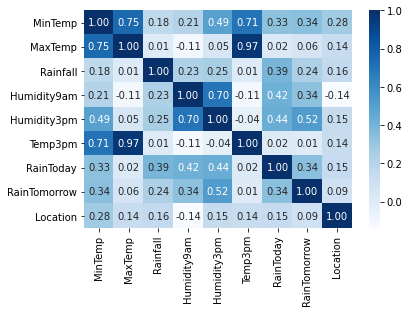

In [37]:
sb.heatmap(dfMinMax.corr(), annot=True, fmt=".2f", cmap='Blues')